# Earnings Based on Earnings

This notebook will create a model for predicting earnings ten years after college graduation based on the earnings six, seven, and eight years after graduation.

In [21]:
# For data ETL
import pandas as pd

# For sklearn techniques
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For visualizations
import matplotlib.pyplot as plt

In [3]:
# Read in the data
earnings6yr = pd.read_csv("Data/earnings_6yr.csv")
earnings7yr = pd.read_csv('Data/earnings_7yr.csv')
earnings8yr = pd.read_csv('Data/earnings_8yr.csv')
earnings10yr = pd.read_csv('Data/earnings_10yr.csv')

## Merge the datasets for analysis

In [4]:
# Merge years six and seven
earnings_6_7 = pd.merge(earnings6yr, earnings7yr, on='UNITID')
earnings_6_7.head()

,Unnamed: 0_x,UNITID,INSTNM_x,Median_earn_6yr_postgrad,Mean_earn_6yr_postgrad,Num_stud_6yr_postgrad_earn_less_30k,Num_stud_6yr_postgrad_earn_30_75k,Num_stud_6yr_postgrad_earn_75k_more,Mean_stud_6yr_postgrad_earn_less_30k,Mean_stud_6yr_postgrad_earn_30_75k,Mean_stud_6yr_postgrad_earn_75k_more,Unnamed: 0_y,INSTNM_y,Mean_earn_7yr_postgrad
0,0,100654,Alabama A & M University,25200,28400,653,431,220,27200,29100,30800,0,Alabama A & M University,29600
1,1,100663,University of Alabama at Birmingham,35100,39400,1052,875,800,38600,39400,40500,1,University of Alabama at Birmingham,40000
2,2,100690,Amridge University,30700,35400,75,PrivacySuppressed,PrivacySuppressed,30300,PrivacySuppressed,PrivacySuppressed,2,Amridge University,38700
3,3,100706,University of Alabama in Huntsville,36200,40300,540,408,430,36300,44200,41500,3,University of Alabama in Huntsville,43400
4,4,100724,Alabama State University,22600,24400,1065,527,162,23500,25400,27700,4,Alabama State University,25200


In [5]:
# Merge year 8 with years six and seven
earnings_6_7_8 = pd.merge(earnings_6_7, earnings8yr, on='UNITID')
earnings_6_7_8.head()

,Unnamed: 0_x,UNITID,INSTNM_x,Median_earn_6yr_postgrad,Mean_earn_6yr_postgrad,Num_stud_6yr_postgrad_earn_less_30k,Num_stud_6yr_postgrad_earn_30_75k,Num_stud_6yr_postgrad_earn_75k_more,Mean_stud_6yr_postgrad_earn_less_30k,Mean_stud_6yr_postgrad_earn_30_75k,Mean_stud_6yr_postgrad_earn_75k_more,Unnamed: 0_y,INSTNM_y,Mean_earn_7yr_postgrad,Unnamed: 0,INSTNM,Median_earn_8yr_postgrad,Mean_earn_8yr_postgrad
0,0,100654,Alabama A & M University,25200,28400,653,431,220,27200,29100,30800,0,Alabama A & M University,29600,0,Alabama A & M University,27100,30600
1,1,100663,University of Alabama at Birmingham,35100,39400,1052,875,800,38600,39400,40500,1,University of Alabama at Birmingham,40000,1,University of Alabama at Birmingham,38300,44100
2,2,100690,Amridge University,30700,35400,75,PrivacySuppressed,PrivacySuppressed,30300,PrivacySuppressed,PrivacySuppressed,2,Amridge University,38700,2,Amridge University,38300,40800
3,3,100706,University of Alabama in Huntsville,36200,40300,540,408,430,36300,44200,41500,3,University of Alabama in Huntsville,43400,3,University of Alabama in Huntsville,41800,45900
4,4,100724,Alabama State University,22600,24400,1065,527,162,23500,25400,27700,4,Alabama State University,25200,4,Alabama State University,25200,27500


In [6]:
# Final merge: six, seven, eight merged with ten
earnings_6_7_8_10 = pd.merge(earnings_6_7_8, earnings10yr, on='UNITID')
earnings_6_7_8_10.head()

,Unnamed: 0_x,UNITID,INSTNM_x,Median_earn_6yr_postgrad,Mean_earn_6yr_postgrad,Num_stud_6yr_postgrad_earn_less_30k,Num_stud_6yr_postgrad_earn_30_75k,Num_stud_6yr_postgrad_earn_75k_more,Mean_stud_6yr_postgrad_earn_less_30k,Mean_stud_6yr_postgrad_earn_30_75k,...,Mean_earn_10yr_postgrad_male,Num_stud_10yr_postgrad_earn_less_30k,Num_stud_10yr_postgrad_earn_less_30k.1,Num_stud_10yr_postgrad_earn_30_75k,Num_stud_10yr_postgrad_earn_75k_more,Num_stud_10yr_postgrad_earn_75k_more.1,Mean_stud_10yr_postgrad_earn_less_30k,Mean_stud_10yr_postgrad_earn_30_75k,Num_stud_10yr_postgrad_earn_75k_more.2,Num_stud_10yr_postgrad_earn_75k_more.3
0,0,100654,Alabama A & M University,25200,28400,653,431,220,27200,29100,...,38500,878,878,611,295,39500,33000,37300,295,39500
1,1,100663,University of Alabama at Birmingham,35100,39400,1052,875,800,38600,39400,...,57400,1529,1529,1182,932,49300,47000,49500,932,49300
2,2,100690,Amridge University,30700,35400,75,PrivacySuppressed,PrivacySuppressed,30300,PrivacySuppressed,...,56000,66,66,68,36,PrivacySuppressed,PrivacySuppressed,48800,36,PrivacySuppressed
3,3,100706,University of Alabama in Huntsville,36200,40300,540,408,430,36300,44200,...,58700,592,592,438,445,55100,47000,55500,445,55100
4,4,100724,Alabama State University,22600,24400,1065,527,162,23500,25400,...,33000,1069,1069,560,203,34300,29000,32500,203,34300


### Clean up the data

In [7]:
# Redefine the dataframe with only the columns needed
earnings_model = earnings_6_7_8_10[["Mean_earn_6yr_postgrad",
                                    "Mean_earn_7yr_postgrad",
                                    "Mean_earn_8yr_postgrad",
                                    "Mean_earn_10yr_postgrad"]]
earnings_model.head()

,Mean_earn_6yr_postgrad,Mean_earn_7yr_postgrad,Mean_earn_8yr_postgrad,Mean_earn_10yr_postgrad
0,28400,29600,30600,35500
1,39400,40000,44100,48400
2,35400,38700,40800,47600
3,40300,43400,45900,52000
4,24400,25200,27500,30600


In [8]:
# Drop NaN data
earnings_model = earnings_model.dropna(axis=0,  how='any')

In [9]:
# Keep only the rows that DO NOT have 'PrivacySupressed'
earnings_model = earnings_model[earnings_model["Mean_earn_6yr_postgrad"] != 'PrivacySuppressed']
earnings_model = earnings_model[earnings_model["Mean_earn_7yr_postgrad"] != 'PrivacySuppressed']
earnings_model = earnings_model[earnings_model["Mean_earn_8yr_postgrad"] != 'PrivacySuppressed']
earnings_model = earnings_model[earnings_model["Mean_earn_10yr_postgrad"] != 'PrivacySuppressed']
earnings_model.head()

,Mean_earn_6yr_postgrad,Mean_earn_7yr_postgrad,Mean_earn_8yr_postgrad,Mean_earn_10yr_postgrad
0,28400,29600,30600,35500
1,39400,40000,44100,48400
2,35400,38700,40800,47600
3,40300,43400,45900,52000
4,24400,25200,27500,30600


### Start the model creation

In [10]:
# Assign X (data) and y (target)
X = earnings_model[["Mean_earn_6yr_postgrad","Mean_earn_7yr_postgrad", "Mean_earn_8yr_postgrad"]]
y = earnings_model["Mean_earn_10yr_postgrad"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4773, 3) (4773, 1)


In [11]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/brianvanhoff/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brianvanhoff/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/brianvanhoff/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
/Users/brianvanhoff/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brianvanhoff/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/brianvanhoff/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# Create a LinearRegression model and fit it to the scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Run the model, visualize it, get meta analysis

In [15]:
# Make predictions using the X_test_scaled data
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

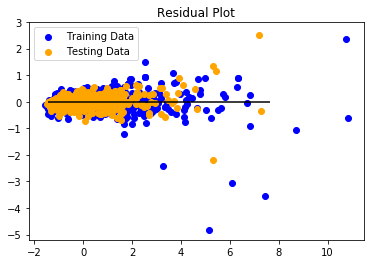

In [16]:
# Plot y_train_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [17]:
# Use X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0360152750705192, R2: 0.9574069842381008


### Create user interface

In [18]:
# Prompt user for inputs
earnings_6yr = int(input("Enter your 6th year earnings: "))
earnings_7yr = int(input("Enter your 7th year earnings: "))
earnings_8yr = int(input("Enter your 8th year earnings: "))

Enter your 6th year earnings: 0
Enter your 7th year earnings: 0
Enter your 8th year earnings: 50000


In [19]:
# Make a dataframe out of the user inputs
user_prediction = pd.DataFrame([{'Mean_earn_6yr_postgrad': earnings_6yr,
                                 'Mean_earn_7yr_postgrad': earnings_7yr,
                                 'Mean_earn_8yr_postgrad': earnings_8yr}])

In [20]:
# Use the model to predict the earning based on the user inputs
user_prediction_earnings = model.predict(user_prediction)
user_prediction_earnings

array([[41124.20450135]])